In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [16]:
X = data.data
y = data.target

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
l = LinearRegression()

In [20]:
l.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred = l.predict(X_test)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error
print("MSE", mean_squared_error(y_test, y_pred))
print("R2 Score", r2_score(y_test, y_pred))

MSE 2900.1936284934827
R2 Score 0.45260276297191926


In [23]:
from sklearn.linear_model import Ridge
R = Ridge(alpha = 0.001)

In [24]:
R.fit(X_train, y_train)

,alpha,0.001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [25]:
y_pred1 = R.predict(X_test)

In [26]:
print("MSE", mean_squared_error(y_test, y_pred1))
print("R2 Score", r2_score(y_test, y_pred1))

MSE 2895.821238005608
R2 Score 0.4534280301019328


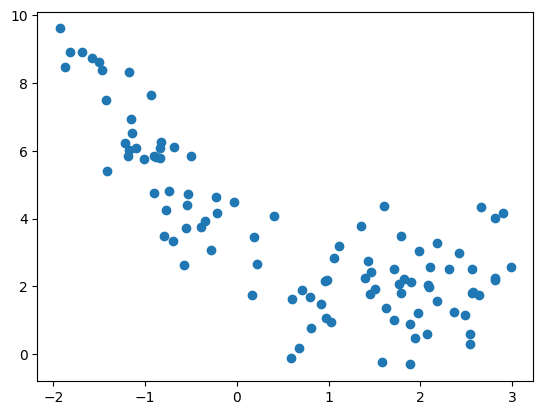

In [28]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

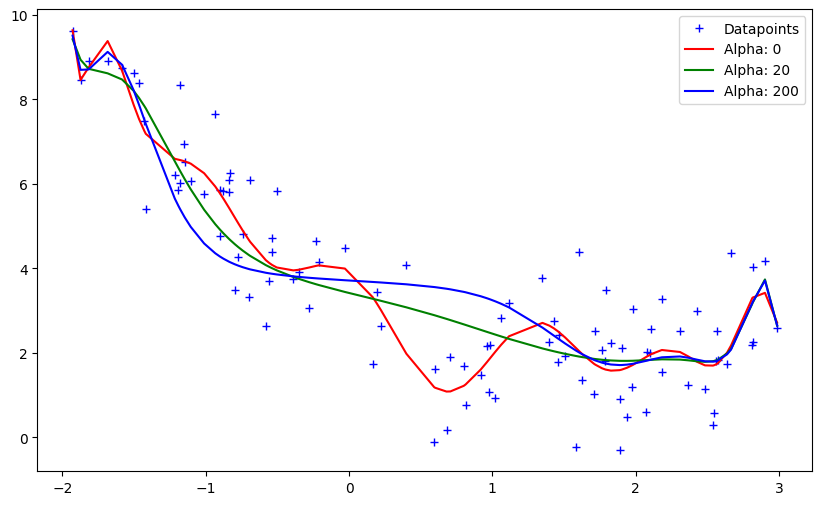

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()